In [1]:
# Setup Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup Dataset Path
DATA_PATH = '../data/raw/TrafficVolume.csv'

In [3]:
# load Data
df = pd.read_csv(DATA_PATH)

In [4]:
# Let Explore
df.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-02 00:45:00.000 +0300,24.636574,46.710026,Mobile,Saudi Arabia,3G,Operator A,Downlink,14.957630,Enabled
1,2019-11-02 00:45:00.000 +0300,24.636124,46.711742,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.304565,Enabled
2,2019-11-02 00:00:00.000 +0300,24.636728,46.710230,Mobile,Saudi Arabia,3G,Operator A,Downlink,20.965813,Enabled
3,2019-11-02 00:00:00.000 +0300,24.636705,46.710243,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.706546,Enabled
4,2019-11-02 02:00:00.000 +0300,24.718973,46.805927,Mobile,Saudi Arabia,4G,Operator B,Uplink,1.471874,Enabled


In [5]:
df.tail()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
138464,2019-11-04 21:30:00.000 +0300,24.665821,46.711,Mobile,Saudi Arabia,4G,Operator B,Downlink,4.347442,Enabled
138465,2019-11-04 22:00:00.000 +0300,24.665821,46.711,Mobile,Saudi Arabia,4G,Operator B,Uplink,0.223296,Enabled
138466,2019-11-04 21:45:00.000 +0300,24.665821,46.711,Mobile,Saudi Arabia,4G,Operator B,Downlink,0.384534,Enabled
138467,2019-11-04 22:15:00.000 +0300,24.665821,46.711,Mobile,Saudi Arabia,4G,Operator B,Downlink,1.876318,Enabled
138468,2019-11-04 21:45:00.000 +0300,24.665821,46.711,Mobile,Saudi Arabia,4G,Operator B,Uplink,0.085922,Enabled


In [6]:
print("Total Number of Rows : {}".format(df.shape[0]))
print("Total Number of Features : {}".format(df.shape[1]))

Total Number of Rows : 138469
Total Number of Features : 10


In [7]:
# Show uniqe values of each column
for i in range(df.shape[1]):
    print("###########################     {}    ###########################".format(df.columns[i]))
    print(df.iloc[:,i].unique())
    print(" ")
    print(" ")

###########################     Timestamp    ###########################
['2019-11-02 00:45:00.000 +0300' '2019-11-02 00:00:00.000 +0300'
 '2019-11-02 02:00:00.000 +0300' '2019-11-02 02:15:00.000 +0300'
 '2019-11-02 01:45:00.000 +0300' '2019-11-02 02:30:00.000 +0300'
 '2019-11-02 01:30:00.000 +0300' '2019-11-02 01:15:00.000 +0300'
 '2019-11-02 00:15:00.000 +0300' '2019-11-02 01:00:00.000 +0300'
 '2019-11-02 00:30:00.000 +0300' '2019-11-02 00:15:00.000 +0600'
 '2019-11-02 00:00:00.000 +0600' '2019-11-02 01:15:00.000 +0600'
 '2019-11-02 01:00:00.000 +0600' '2019-11-02 08:45:00.000 +0300'
 '2019-11-02 06:15:00.000 +0300' '2019-11-02 07:00:00.000 +0300'
 '2019-11-02 06:45:00.000 +0300' '2019-11-02 08:30:00.000 +0300'
 '2019-11-02 09:15:00.000 +0300' '2019-11-02 09:30:00.000 +0300'
 '2019-11-02 06:30:00.000 +0300' '2019-11-02 08:15:00.000 +0300'
 '2019-11-02 15:45:00.000 +0300' '2019-11-02 15:00:00.000 +0300'
 '2019-11-02 16:45:00.000 +0300' '2019-11-02 17:30:00.000 +0300'
 '2019-11-02 17:0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138469 entries, 0 to 138468
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               138469 non-null  object 
 1   LocationLatitude        138469 non-null  float64
 2   LocationLongitude       138469 non-null  float64
 3   RadioConnectionType     138469 non-null  object 
 4   Country                 138469 non-null  object 
 5   RadioNetworkGeneration  138469 non-null  object 
 6   RadioOperatorName       138469 non-null  object 
 7   TrafficDirection        138469 non-null  object 
 8   TrafficVolume           138469 non-null  float64
 9   RadioMobileDataEnabled  138469 non-null  object 
dtypes: float64(3), object(7)
memory usage: 10.6+ MB


In [10]:
# Missing Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
Timestamp,0,0.0
LocationLatitude,0,0.0
LocationLongitude,0,0.0
RadioConnectionType,0,0.0
Country,0,0.0
RadioNetworkGeneration,0,0.0
RadioOperatorName,0,0.0
TrafficDirection,0,0.0
TrafficVolume,0,0.0
RadioMobileDataEnabled,0,0.0


In [11]:
#Count of rows that contain value 'Unknown'
for column in df.columns:
    print('{} : '.format(column) + str(sum(df[column] == 'Unknown')))

Timestamp : 0
LocationLatitude : 0
LocationLongitude : 0
RadioConnectionType : 0
Country : 0
RadioNetworkGeneration : 2
RadioOperatorName : 0
TrafficDirection : 0
TrafficVolume : 0
RadioMobileDataEnabled : 0


In [12]:
#check duplicate rows
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(df)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,138439,30,99.978335,0.021665


<AxesSubplot:>

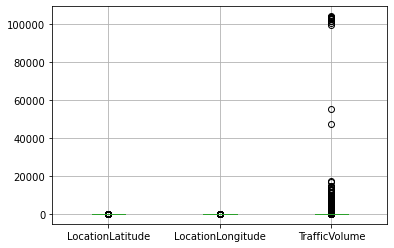

In [13]:
df.boxplot()

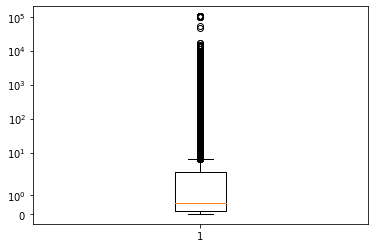

<Figure size 720x720 with 0 Axes>

In [14]:
plt.boxplot(df['TrafficVolume'])
plt.yscale('symlog')
plt.figure(figsize=(10,10))
plt.show()

In [15]:
# Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(df['TrafficVolume'], 25)

# Calculate Q3 (75th percentile of the data) for the given feature
Q3 = np.percentile(df['TrafficVolume'], 75)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = 1.5 * (Q3 - Q1)

# Display the outliers
print ("Data points considered outliers for the feature '{}':".format('TrafficVolume'))
feature_outliers = df[~((df['TrafficVolume']>= Q1 - step) & (df['TrafficVolume'] <= Q3 + step))]
print("")
print(feature_outliers['TrafficVolume'].unique())
print("")
print("Number of total outliers : {} ".format(feature_outliers['TrafficVolume'].shape[0]))

Data points considered outliers for the feature 'TrafficVolume':

[ 14.95763   20.965813 102.563844 ...  44.452349  17.797507  10.671339]

Number of total outliers : 23861 


# Conclusion and Recommended actions

- Convert Timestamp to datetime instead of object
- there are 2 Unknown value in RadioNetworkGeneration column
- there are 30 Duplicate rows should be dropped